# 확률분포

- 확률변수가 어떻게 움직이는지를 나타낸 것

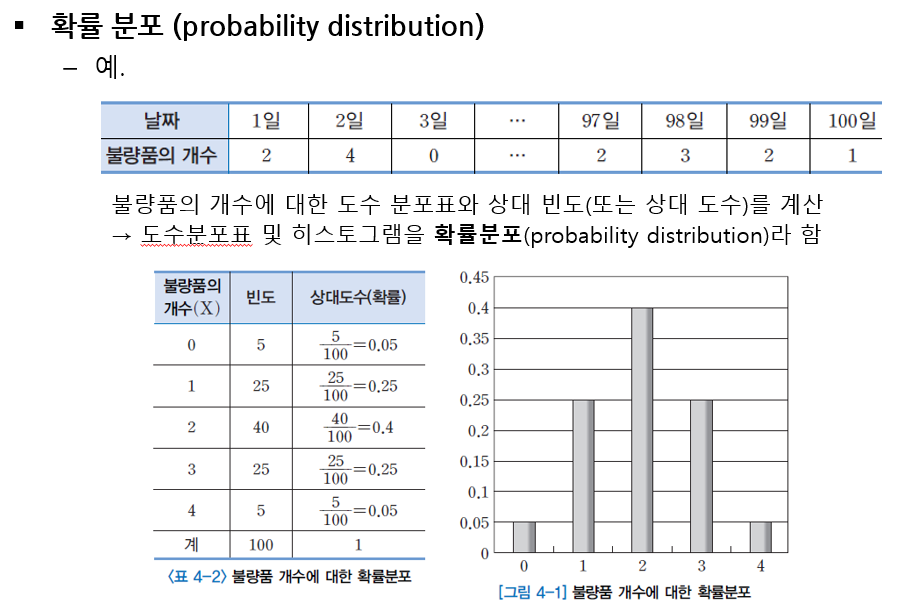
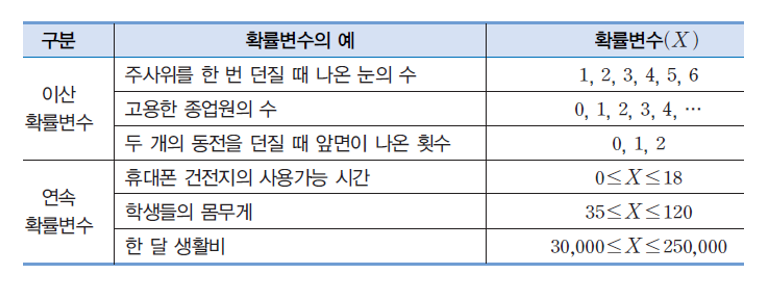

### 확률변수
- 실험이나 관찰의 결과 값을 1:1 실수로 대응시키는 함수
- 일정한 확률로 나타나는(발생하는) 사건에 대해 숫자를 부여한 변수
- 확률 분포는 확률변수가 취할 수 있는 모든 값에 대해 각각의 확률을 대응시킨 것 
- 대문자(X나 Y)로 표시하고 실수 값은 소문자(x나 y)로 나타냄
- 예.  불량품의 개수 = 확률 변수(random variable)


### 확률 변수의 구분
- 이산 확률변수(discrete random variable) : 변수가 취할 수 있는 값의 개수가 유한 


- 연속 확률변수(continuous random variable) : 변수가 취할 수 있는 값의 개수가 무한

![](이산연속확률변수.png)


#### 확률 분포의 구분
- 이산 확률분포(discrete probability distribution)
    - 이산 확률변수 X에 대한 확률을 확률 함수로 나타낸 것
    - 히스토그램의 막대 높이로 표현
- 연속 확률분포
    - 연속 확률변수 X에 대해 대응하는 확률을 표, 그래프 또는 함수식으로 나타낸 것
    - 연속 확률분포의 모양은 곡선의 형태로 표현 
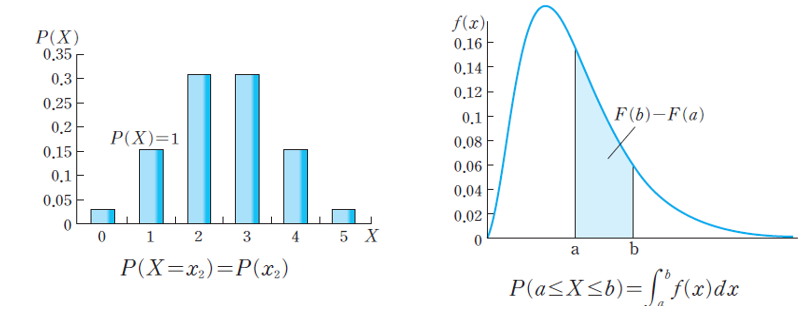

### 확률함수
- 확률변수 X가 특정 실수 값 x를 취할 확률을 X의 함수(f)로 나타낸 것
    - 확률질량함수(probability mass function: pmf)
        - 확률변수가 이산형인 경우
    - 확률밀도함수(probability density function: pdf)
        - 확률변수가 연속형인 경우


### 확률 변수의 예
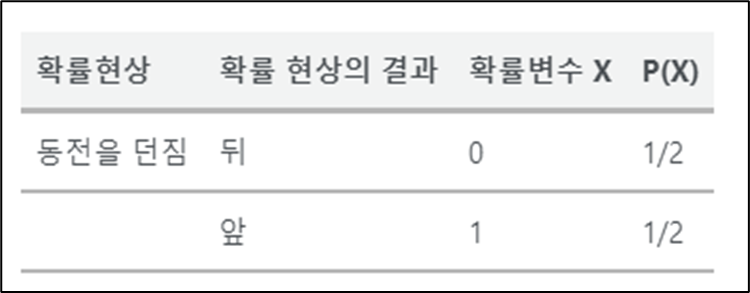

# 이산형 확률분포

## 1차원 이산형 확률분포

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 이산형 확률

- 확률변수 X가 취할 수 있는  값의 집합 {𝑥_1,𝑥_2, ⋯}
- X가 𝑥_𝑘 라는 값을 취하는 확률

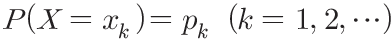



- 확률질량함수(확률함수)- pmf
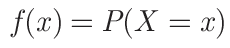

![](표4-2.jpg)

- 위 불공정한 주사위 확률분포의 확률 변수 확인
![](불공정한주사위확률변수.png)

In [3]:
# 확률변수 - 불공정한 주사위를 던졌을 때 취할 수 있는 값의 set
x_set = np.array([1,2,3,4,5,6])

In [4]:
# 위 식을함수로 구현
# 불공정한 주사위 확률 분포를 확률 함수로 구현
def f(x) :
    if x in x_set :
        return x / 21
    else :
        return 0

In [5]:
# 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트 => 확률 분포
x = [x_set,f]
#확률 분포[x_set, f]에 의해 확률 변수 X의 동작이 결정 됨
# f는 확률값을 만들어내는 관계식

In [6]:
# 위 확률 변수에 대하여 확률값을 관계식(확률함수) f로 계산 - 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])

In [10]:
# 불공정한 주사위의 이산 확률 분포
## 이산형 확률 분포(나타날 수 있는값과 확률의 대응)
dict(zip(x_set,prob))
pd.DataFrame({'p_x':x_set,'p_k':prob})

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

,p_x,p_k
0,1,0.047619
1,2,0.095238
2,3,0.142857
3,4,0.190476
4,5,0.238095
5,6,0.285714


<BarContainer object of 6 artists>

Text(0.5, 0, 'value')

Text(0, 0.5, 'probability')

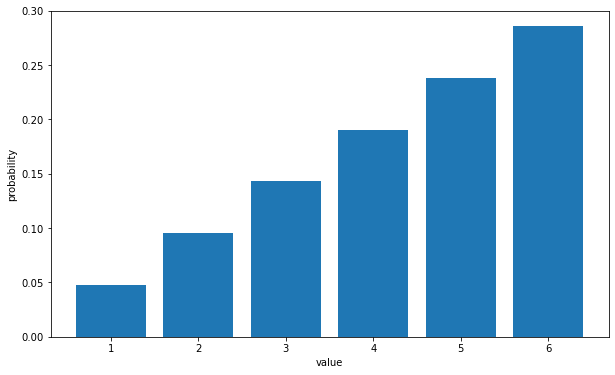

In [7]:
# 이산형 확률 분포 그래프

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')
plt.show()

### 이산형 확률분포 성질

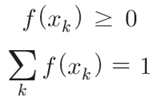

#### 모든 확률은 0보다 크고
#### 확률의 합은 1이다

In [8]:
prob >= 0

array([ True,  True,  True,  True,  True,  True])

In [9]:
np.all(prob >= 0)

True

In [10]:
np.sum(prob)

0.9999999999999999

- 위 두 성질을 만족하므로 이산형 확률 분포임

### 누적분포함수(분포함수) 𝐹(𝑥)
- 𝑋가 𝑥 이하가 될 때의 확률을 반환하는 함수
- 누적 분포 함수(cdf)는 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수이다.
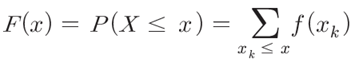
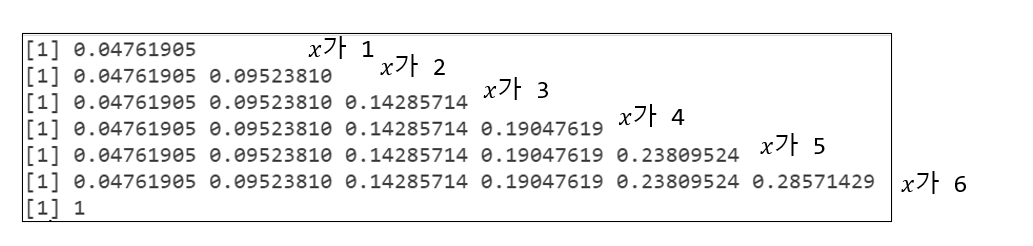

In [11]:
# 작거나 같은 이므로 주어진 x보다 작거나 같은동안의 확률을 모두 더함
# 불공정한 주사위에 대한 누적분포함수 F(x)
# 불공정한 주사위에 대한 확률함수 f(x)

def F(x) :
    temp = [f(x_k) for x_k in x_set if x_k <= x]
#     print(temp)
    return np.sum(temp)

In [12]:
F(3)

0.2857142857142857

In [13]:
# 주사위의 눈이 3 이하가 될 확률
F(3)
# x_set 의 원소값이 3보다 작거나 같은때 까지의 확률의 합계
# x_set 의 원소값이 3일 때 확률
f(3)

0.2857142857142857

0.143

In [14]:
F(6)

0.9999999999999999

## 1차원 이산형 확률변수의 지표

#### 평균 : 기댓값
- 확률변수를 무제한 시행하여 얻은 실험값의 합산

- 기댓값 = 확률분포의 평균(모평균과는 다른 개념(n으로 나누지 않는다))

- (X) 또는 μX 로 표시

- 이산확률분포의 기대값 : 확률을 가중값으로 사용한 가중평균
- 연속확률분포의 기대값 : 적분개념의 면적
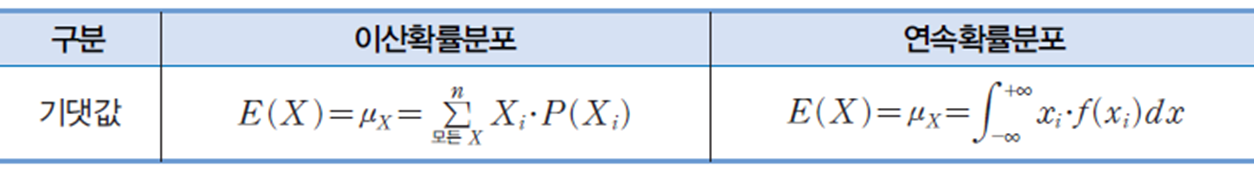

- 모평균
    - 모평균(population mean) μ는 모 집단의 평균이다. 모두 더한 후 전체 데이터 수 n으로 나눈다.



###  불공정 주사위 확률에대한 기댓값

In [15]:
#불공정한 주사위 확률(가정한 확률)을 구현한 확률함수 f
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0


In [16]:
# 확률변수가 취할 수 있는 값의 set
x_set = np.array([1, 2, 3, 4, 5, 6])

In [17]:
help(f)
import inspect
inspect.getsource(f) 

Help on function f in module __main__:

f(x)
    #불공정한 주사위 확률(가정한 확률)을 구현한 확률함수 f



'def f(x):\n    if x in x_set:\n        return x / 21\n    else:\n        return 0\n'

In [18]:
# 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트 => 확률 분포
#확률 분포[x_set, f]에 의해 확률 변수 X의 동작이 결정 됨
X = [x_set,f]

In [19]:
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [20]:
# 기댓값 - (Xi * P(Xi)).sum
# 확률변수 Xi에대한 확률을 가중값으로 곱한 후 각 확률변수에 대한
# 연산결과를 모두 더한 값
p_sum = 0
for x_k in x_set :
    temp = x_k * f(x_k)
    p_sum += temp
p_sum

np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

4.333333333333333

In [21]:
# 값에 대한 확률
prob = np.array([f(x_k) for x_k in x_set])

In [22]:
prob

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

In [23]:
x_set * prob
np.sum(x_set * prob) # 기댓값

array([0.048, 0.19 , 0.429, 0.762, 1.19 , 1.714])

4.333333333333333

In [24]:
# 불공정한 주사위를 100만번 주사위를 굴려 얻은 표본평균
sample = np.random.choice(x_set,int(1e6), p=prob)
np.mean(sample) 
# 확률분포 평균(기댓값) 과 일치(근사)

4.330391

In [25]:
# 기대값  함수 구현 - 불공정한 주사위의 확률변수에 대한 기대값 함수
def E(X, g=lambda x: x) :
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [26]:
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [27]:
E(X)

4.333333333333333

- 확률변수에 수정을 가하면 그 변수도 확률변수임
    - 예를들어 X가 확률변수면 2𝑋+3도 확률변수 
- 확률변수 수정(변환)을 통애 2𝑋+3을 확률변수 𝑌라고 하면 : Y변수의 기댓값은?

    - 기댓값 = 확률변수의 평균
        - 확률변수 Y=2𝑋+3의 기댓값

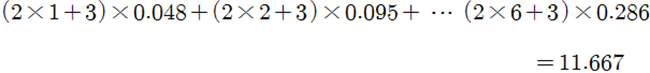

In [28]:
E(X, g=lambda x : 2*x+3)

11.666666666666664

In [29]:
# 확률변수 2X+3의 기대값
2 * E(X) + 3

11.666666666666666

### 분산 
- 확률변수의 각 값에 기대값을 뺀 편차의 제곱에 대한 기대값으로 계산

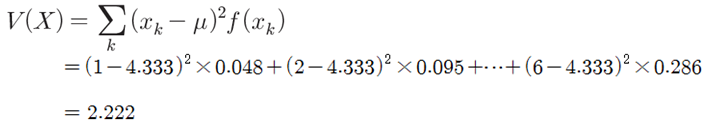

### 불공정한 주사위의 분산

In [30]:
mean = E(X) # 불공정한 주사위의 기댓값
var_p = 0
for x_k in x_set :
    var_p += (x_k - mean)**2 * f(x_k)
var_p

2.2222222222222223

In [31]:
# 불공정한 주사위 분산 함수
def V(X, g=lambda x : x) :
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)** 2 * f(x_k) for x_k in x_set])

In [32]:
V(X)

2.2222222222222223

- 확률변수 x에 대한 변환변수 2x+3 에 대한 분산 계산

In [34]:
V(X, lambda x : 2*x+3)

8.88888888888889

<!-- ![()](분산의공식.png) -->
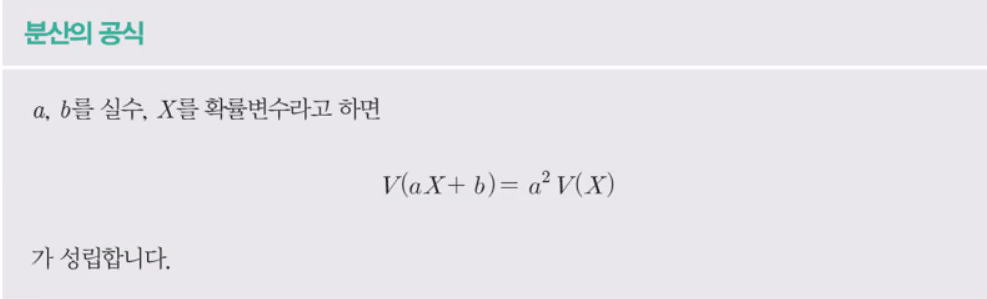

In [36]:
# 확률변수 X의 변환변수 aX+b가 있다면
# V(aX+b) == a**2V(X)
# 변환변수 2X+3의 분산은?
2**2*V(X)

8.88888888888889